In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous, rv_discrete

In [3]:
class chabrier(rv_continuous):
    def _pdf(self,m):
        '''Note that the masses are in M_solar'''
        k=0.158*1/(np.log(10))*np.exp(-(np.log(1/0.08))**2/(2*0.69**2))
        return np.where(m<1, 0.158*1/(np.log(10)*m)*np.exp(-(np.log(m/0.08))**2/(2*0.69**2)), k*m**(-2.3))

In [4]:
#the lower/upper limits of the distribution
a=0.5
b=200
IMF=chabrier(a=a, b=b)

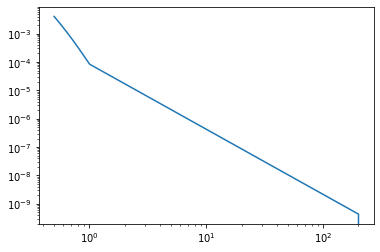

In [5]:
m=np.logspace(np.log10(a), np.log10(b), 100000)
spec=IMF.pdf(m)
plt.loglog(m, spec)
# plt.plot(m, IMF.logpdf(m))

In [6]:
spec=spec/np.sum(spec)

In [7]:
np.random.choice(m, p=spec, size=1)

array([0.53872357])

 ### Animation from here on out

In [3]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.animation as anim
 
class AnimatedGif:
    def __init__(self, size=(640, 480)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []
 
    def add(self, image, label=''):
        plt_im = plt.imshow(image, cmap='Greys', vmin=0, vmax=1, animated=True)
        plt_txt = plt.text(10, 310, label, color='red')
        self.images.append([plt_im, plt_txt])
 
    def save(self, filename):
        im_ani = anim.ArtistAnimation(self.fig, self.images)
        Writer = anim.writers['pillow'] # for .gif
#         Writer = anim.writers['html'] # for .html, do not use
        writer = Writer(fps=4, bitrate=1800)
        im_ani.save(filename, writer=writer)
        
m = 480
n = 320
x = np.linspace(-2, 1, num=m).reshape((1, m))
y = np.linspace(-1, 1, num=n).reshape((n, 1))
C = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
Z = np.zeros((n, m), dtype=complex)
M = np.full((n, m), True, dtype=bool)
 
animated_gif = AnimatedGif(size=(m, n))
animated_gif.add(M, label='0')
# images = []
for i in range(1, 151):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > 2] = False
    if i <= 15 or not (i % 100):
        animated_gif.add(M, label=str(i))
        
# filename
animated_gif.save('mov/mandelbrot.gif')